In [4]:
import sys,os
sys.path.append('../../')
from paths import *
import numpy as np
from time import time 
import matplotlib.pyplot as plt
from dadapy._utils.stochastic_minimization_hamming import *
from dadapy.hamming import Hamming

def fit_CD(c_init,c_end,values,cumulative,printing=False):
  p,cov = np.polyfit(np.log(values[c_init:c_end]),
                    np.log(cumulative[c_init:c_end]),
                    deg=1,
                    cov=True,
                    )
  if printing:  
    print(f'{p=}')
    print(f'{cov=}')
  return p,cov

rcpsize = 20
plt.rcParams['xtick.labelsize']= rcpsize
plt.rcParams['ytick.labelsize']=rcpsize
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = rcpsize
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8-dark-palette']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)
markers = ['p','o','h','^','s']
plot_id = 0

L=30


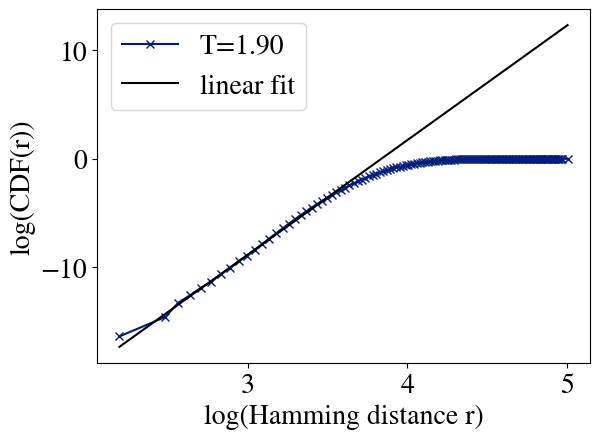

In [9]:
T_list = [1.9]
L_list = np.arange(30,30+1,10,dtype=int)
# T_list = [1.9,2.3,3]
# T_list = np.arange(1.8,3+eps,.1)
# L_list = np.array([30])

M_flag = 1
N_list = L_list**2

fig,ax = plt.subplots(1)

ds = np.zeros(shape=(len(L_list),
                    len(T_list),)
)
for L_id,L in enumerate(L_list):
  print(f'{L=}')
  for T_id,T in enumerate(T_list):
    histfolder = makefolder(base=f'results/hists/',
                              create_folder=True,
                              L=L,
                              T=float(T),
                              M_flag=M_flag,
                              )
    H = Hamming()
    H.D_histogram(compute_flag=0,
                  save=0,
                  resultsfolder=histfolder)
    cumulative = np.cumsum(H.D_probs)
    c_init = 3
    c_end = len(cumulative)//10
    p,cov = fit_CD(c_init,c_end,H.D_values,cumulative)
    if len(L_list)>1:
      lbl = f'{L=}'
    else:
      lbl = f'{T=:.2f}'
    ax.plot(np.log(H.D_values),np.log(cumulative),label=lbl,marker='x')
    ax.plot(np.log(H.D_values),
            np.log(H.D_values)*p[0] + p[1],
            color='black',
            label='linear fit')
    ds[L_id,T_id] = p[0]
    # dfolder = makefolder(base=f'results/d/',
    #                           create_folder=True,
    #                           L=L,
    #                           T=float(T),
    #                           M_flag=M_flag,
    #                           )

ax.set_xlabel('log(Hamming distance r)')
ax.set_ylabel('log(CDF(r))')

ax.legend()
plt.tight_layout()
fig.savefig(f'CD_fit_T{T:.2f}.pdf')
plt.show()

In [10]:
p

array([ 10.55, -40.48])

In [11]:
cov

array([[ 0.01, -0.04],
       [-0.04,  0.11]])

In [56]:
np.savetxt(f'results/ds_T{T:.2f}.txt',ds)


In [ ]:
np.savetxt(f'results/ds_L{L}.txt',ds)


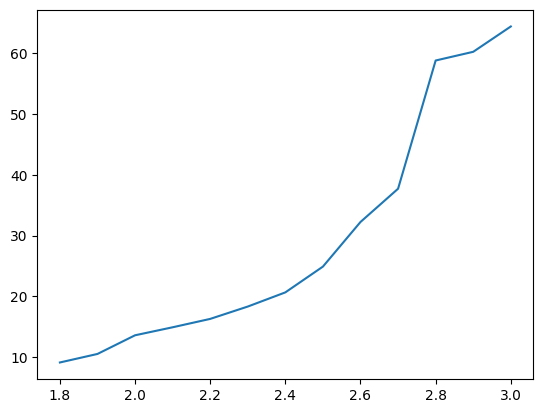

In [51]:
fig,ax = plt.subplots(1)

ax.plot(T_list,ds[L_id,:])

plt.show()